In [72]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [193]:
class Line:
    def __init__(self, m = 0, b = 0):
        self.m = m
        self.b = b
        self.f = lambda x: (m*x)+b

In [414]:
l1 = Line(-1, 5)
l2 = Line(-1, 10)
l3 = Line(-1, 15)

In [415]:
rng = np.random.default_rng()

In [416]:
def get_y_adds(size):
    return(((rng.integers(low = 1, high = 20, size = size))-10)/20)

In [417]:
sizeA = 100*5
sizeB = 260*5

sizeS = 5
# 10% = 10
# 20% = 5
# 25% = 4
# 50% = 2

In [411]:
sizeA*2 + sizeB

2300

In [521]:
X1 = rng.integers(low = 10, high = 41, size = sizeA)/10
Y1 = l1.f(X1) + get_y_adds(sizeA)
L11 = np.full(len(X1), -1)
L12 = np.full(len(X1), -1)
D1 = np.column_stack((X1, Y1, L11, L12))
DF1 = pd.DataFrame(data = D1, columns = ['x', 'y', 'l1', 'l2'])
sDF1 = DF1[:len(DF1)//sizeS]

In [522]:
X2 = rng.integers(low = 10, high = 91, size = sizeB)/10
Y2 = l2.f(X2) + get_y_adds(sizeB)
L21 = np.full(len(X2), -1)
L22 = np.full(len(X2), 1)
D2 = np.column_stack((X2, Y2, L21, L22))
DF2 = pd.DataFrame(data = D2, columns = ['x', 'y', 'l1', 'l2'])
sDF2 = DF2[:len(DF2)//sizeS]

In [523]:
X3 = rng.integers(low = 60, high = 91, size = sizeA)/10
Y3 = l3.f(X3) + get_y_adds(sizeA)
L31 = np.full(len(X3), 1)
L32 = np.full(len(X3), 1)
D3 = np.column_stack((X3, Y3, L31, L32))
DF3 = pd.DataFrame(data = D3, columns = ['x', 'y', 'l1', 'l2'])
sDF3 = DF3[:len(DF3)//sizeS]

In [524]:
DF = pd.concat((DF1, DF2, DF3))
sDF = pd.concat((sDF1, sDF2, sDF3))

In [536]:
class Perceptron:
    def __init__(self, learning_rate = 0.1, n_iterations = 50):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors.append(errors)
        return(self)


    def net_input(self, X):
        return(np.dot(X, self.w_[1:]) + self.w_[0])

    
    def predict(self, X):
        return(np.where(self.net_input(X) >= 0.0, 1, -1))

In [558]:
glr = 0.1
gni = 35

P1 = Perceptron(glr, gni)
P2 = Perceptron(glr, gni)

P1.fit(sDF[['x', 'y']].values, sDF['l1'].values)
P2.fit(sDF[['x', 'y']].values, sDF['l2'].values)

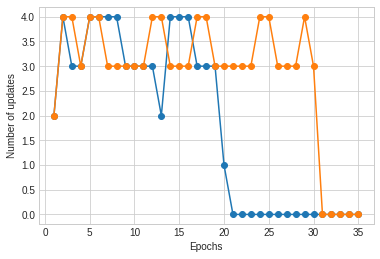

In [561]:
plt.plot(range(1, len(P1.errors) + 1), P1.errors, marker='o')
plt.plot(range(1, len(P2.errors) + 1), P2.errors, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [564]:
W1 = P1.w_
W2 = P2.w_

Pf1 = lambda x: (W1[0] + W1[1]*x)/-W1[2]
Pf2 = lambda x: (W2[0] + W2[1]*x)/-W2[2]

m1 = W1[1]/-W1[2]
m2 = W2[1]/-W2[2]

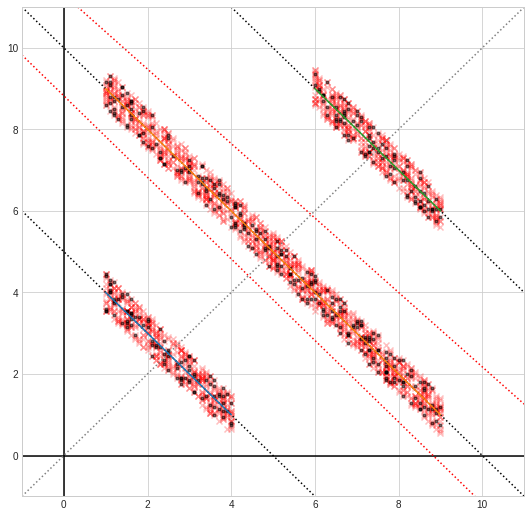

In [567]:
plt.figure(figsize = [9, 9])
plt.axis([-1, 11, -1, 11])

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')

plt.axline([0, l1.f(0)], slope = l1.m, color = 'black', linestyle = ':')
plt.axline([0, l2.f(0)], slope = l2.m, color = 'black', linestyle = ':')
plt.axline([0, l3.f(0)], slope = l3.m, color = 'black', linestyle = ':')

plt.axline([0,0], slope = 1, color = 'grey', linestyle = ':')

plt.plot([1, l1.f(1)], [4, l1.f(4)])
plt.plot([1, l2.f(1)], [9, l2.f(9)])
plt.plot([6, l3.f(6)], [9, l3.f(9)])

# Data
plt.scatter(DF1['x'], DF1['y'], color = 'red', marker = 'x', alpha = 0.25)
plt.scatter(DF2['x'], DF2['y'], color = 'red', marker = 'x', alpha = 0.25)
plt.scatter(DF3['x'], DF3['y'], color = 'red', marker = 'x', alpha = 0.25)

# Sample data
plt.scatter(sDF1['x'], sDF1['y'], color = 'black', marker = '.', alpha = 0.5)
plt.scatter(sDF2['x'], sDF2['y'], color = 'black', marker = '.', alpha = 0.5)
plt.scatter(sDF3['x'], sDF3['y'], color = 'black', marker = '.', alpha = 0.5)

# Predict, lines.
plt.axline([0, Pf1(0)], slope = m1, color = 'red', linestyle = ':')
plt.axline([0, Pf2(0)], slope = m2, color = 'red', linestyle = ':')

plt.show()